In [1]:
import cfgrib
import xarray as xr

file = ['flxf2018103100.01.2018103100.grb2',
            'flxf2018103106.01.2018103100.grb2',
            'flxf2018103112.01.2018103100.grb2',
            'flxf2018103118.01.2018103100.grb2',
            'flxf2018110100.01.2018103100.grb2'
            ]



ValueError: Variables {'time'} are coordinates in some datasets but not others.

In [2]:
ds0 = cfgrib.open_dataset(file[0], engine = 'cfgrib', filter_by_keys={'typeOfLevel': 'surface'})
ds1 = cfgrib.open_dataset(file[1], engine = 'cfgrib', filter_by_keys={'typeOfLevel': 'surface'})
ds2 = cfgrib.open_dataset(file[2], engine = 'cfgrib', filter_by_keys={'typeOfLevel': 'surface'})
ds3 = cfgrib.open_dataset(file[3], engine = 'cfgrib', filter_by_keys={'typeOfLevel': 'surface'})
ds4 = cfgrib.open_dataset(file[4], engine = 'cfgrib', filter_by_keys={'typeOfLevel': 'surface'})

dnew = xr.concat([ds0, ds1, ds2 , ds3, ds4], dim = 'time')
display(dnew)

<xarray.Dataset>
Dimensions:     (time: 5, latitude: 190, longitude: 384)
Coordinates:
  * time        (time) datetime64[ns] 2018-10-31 2018-10-31 ... 2018-10-31
    step        (time) timedelta64[ns] 00:00:00 06:00:00 ... 1 days 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 89.28 88.34 87.4 ... -87.4 -88.34 -89.28
  * longitude   (longitude) float64 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
    valid_time  (time) datetime64[ns] 2018-10-31 ... 2018-11-01
Data variables: (12/53)
    uflx        (time, latitude, longitude) float32 -0.135 -0.135 ... 0.075
    vflx        (time, latitude, longitude) float32 0.001 0.003 ... 0.035 0.036
    shtfl       (time, latitude, longitude) float32 32.0 31.0 ... -30.0 -30.0
    lhtfl       (time, latitude, longitude) float32 23.0 23.0 22.0 ... 0.0 0.0
    t           (time, latitude, longitude) float32 259.3 259.3 ... 227.9 227.9
    sdwe        (time, latitude, longitude) float32 83.31 83.4 ... 123.2 123.2
    ...          ...
    snohf       (time, latitude, longitude) float32 nan nan nan ... 0.0 0.0 0.0
    vbdsf       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 49.0 49.0
    vddsf       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 48.0 47.0
    nbdsf       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 137.0 137.0
    nddsf       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 34.0 34.0
    srweq       (time, latitude, longitude) float32 8e-06 8e-06 ... 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2022-11-14T11:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
# save to a new file
dnew.to_netcdf('CFS_Sample_Series.nc')

(array([  357.,  5370., 17010., 14680., 37991., 68475., 67505., 92302.,
        60076.,  1034.]),
 array([205.264  , 217.07631, 228.88861, 240.70091, 252.51321, 264.3255 ,
        276.13782, 287.95013, 299.76242, 311.5747 , 323.38702],
       dtype=float32),
 <BarContainer object of 10 artists>)

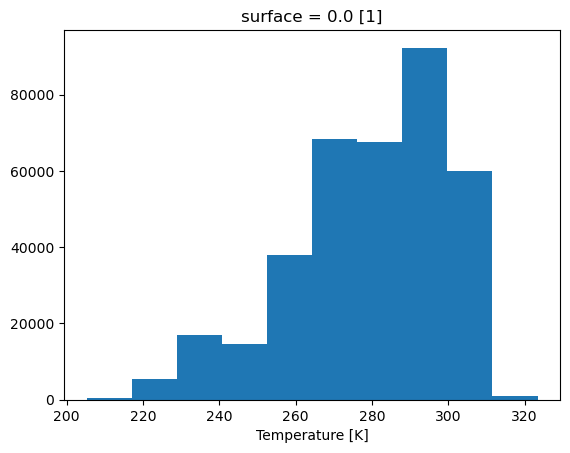

In [42]:
dnew.t.plot()

dnew = xr.Dataset()

for count, name in enumerate(file):
    ds = cfgrib.open_dataset(name , # link to the data we are opening from
                                        engine = 'cfgrib', # Engine We are Using (cfgrib)
                                        filter_by_keys={'typeOfLevel': 'surface'},
                                        )
    
    dnew = xr.concat([dnew, ds], dim = 'time')
    display(dnew)

dnew